In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [101]:
train_df=pd.read_csv('ABC_Bank_train_data.csv')
test_df=pd.read_csv('ABC_Bank_test_data.csv')

In [102]:
train_df.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [103]:
test_df.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    int64  
 1   account_info      200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_account   200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [106]:
train_df.duplicated().sum()

0

In [107]:
test_df.duplicated().sum()

0

In [108]:
train_df.describe()

,serial number,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [109]:
test_df.describe()

,serial number,duration_month,poi,resident_since,age,credits_no,liables
count,200.000000,200.000000,195.000000,200.000000,198.000000,200.000000,200.000000
mean,100.500000,21.910000,2.974359,2.860000,36.106061,1.450000,1.185000
std,57.879185,11.635671,1.081408,1.093792,11.053808,0.607739,0.389272
min,1.000000,4.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,50.750000,12.000000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,100.500000,20.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,150.250000,27.250000,4.000000,4.000000,43.000000,2.000000,1.000000
max,200.000000,60.000000,4.000000,4.000000,68.000000,4.000000,2.000000


In [110]:
train_df.drop(['serial number'],axis=1,inplace=True)

In [111]:
test_df1=test_df.drop(['serial number'],axis=1)

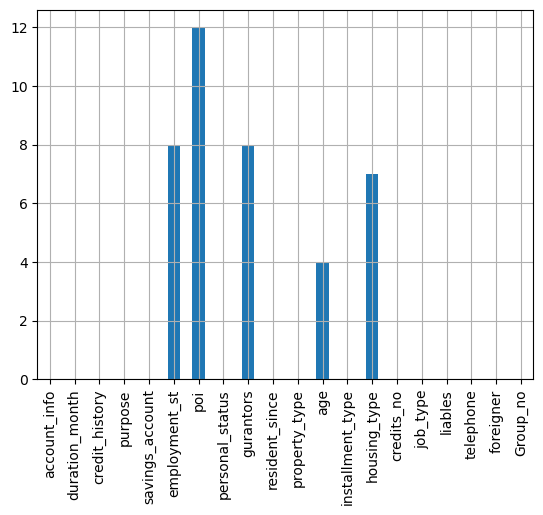

In [112]:
train_df.isna().sum().plot(kind='bar')
plt.grid()

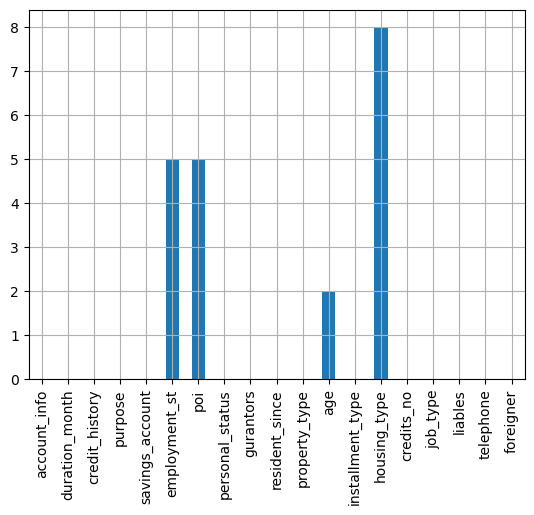

In [113]:
test_df1.isna().sum().plot(kind='bar')
plt.grid()

In [114]:
def missing_value(df):
    for i in df.columns:
        if df[i].isna().sum()>0:
            if df[i].dtype=='object':
                df[i].fillna(df[i].mode()[0],inplace=True)
            else:
                df[i].fillna(df[i].median(),inplace=True)

In [115]:
missing_value(train_df)

In [116]:
missing_value(test_df1)

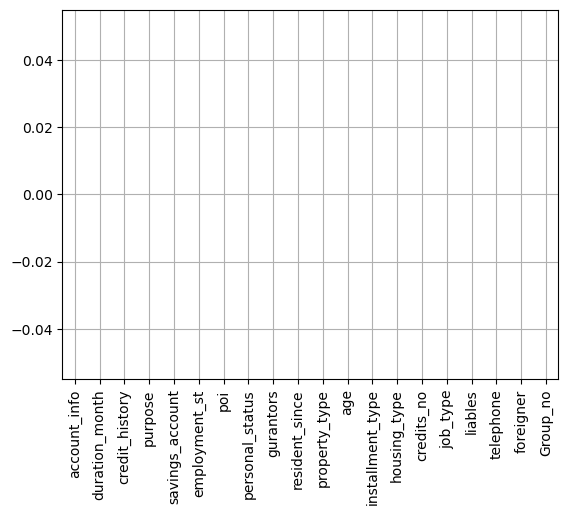

In [117]:
train_df.isna().sum().plot(kind='bar')
plt.grid()

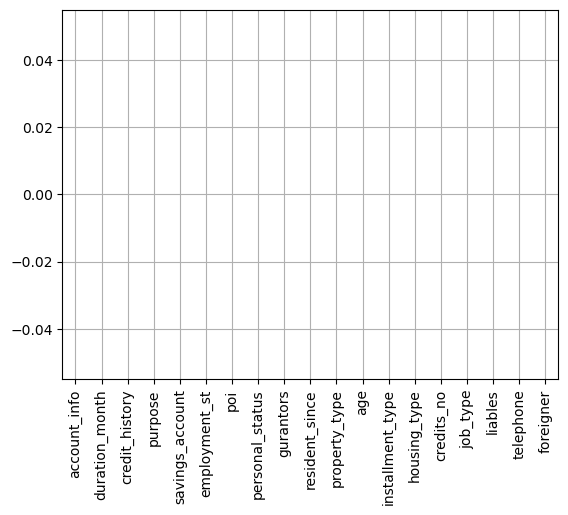

In [118]:
test_df1.isna().sum().plot(kind='bar')
plt.grid()

In [119]:
for i in train_df.columns:
    if train_df[i].dtype=='object':
        print(train_df[i].value_counts(),'\n')

A14    310
A12    226
A11    209
A13     55
Name: account_info, dtype: int64 

A32    424
A34    235
A33     71
A31     37
A30     33
Name: credit_history, dtype: int64 

A43     223
A40     184
A42     144
A41      81
A49      77
A46      45
A45      19
A410     10
A44       9
A48       8
Name: purpose, dtype: int64 

A61    476
A65    142
A62     89
A63     51
A64     42
Name: savings_account, dtype: int64 

A73    275
A75    203
A74    141
A72    133
A71     48
Name: employment_st, dtype: int64 

A93    437
A92    255
A94     70
A91     38
Name: personal_status, dtype: int64 

A101    728
A103     42
A102     30
Name: gurantors, dtype: int64 

A123    266
A121    229
A122    177
A124    128
Name: property_type, dtype: int64 

A143    653
A141    112
A142     35
Name: installment_type, dtype: int64 

A152    570
A151    140
A153     90
Name: housing_type, dtype: int64 

A173    503
A172    161
A174    119
A171     17
Name: job_type, dtype: int64 

A191    481
A192    319
Name: teleph

In [120]:
cat_var=train_df.select_dtypes('object').columns
cat_var

Index(['account_info', 'credit_history', 'purpose', 'savings_account',
       'employment_st', 'personal_status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')

In [121]:
# train_df=pd.get_dummies(data=train_df,columns=cat_var)
# test_df1=pd.get_dummies(data=test_df1,columns=cat_var)

In [122]:
train_df.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,A11,6,A34,A43,A65,A75,4.0,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,A12,48,A32,A43,A61,A73,2.0,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,A61,A74,2.0,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,A11,42,A32,A42,A61,A74,2.0,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,A61,A73,3.0,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [123]:
test_df1.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


In [124]:
x=train_df.drop(['Group_no'],axis=1)
y=train_df['Group_no']

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=143,test_size=0.2)

In [126]:
le=LabelEncoder()
for i in xtrain.columns:
    if xtrain[i].dtype=='object':
        xtrain[i]=le.fit_transform(xtrain[i])
        xtest[i]=le.transform(xtest[i])
        test_df1[i]=le.transform(test_df1[i])

In [127]:
pf=PolynomialFeatures(2)
xtrain=pf.fit_transform(xtrain)
xtest=pf.transform(xtest)

In [259]:
test_df1=pf.transform(test_df1)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Group_no', ylabel='count'>

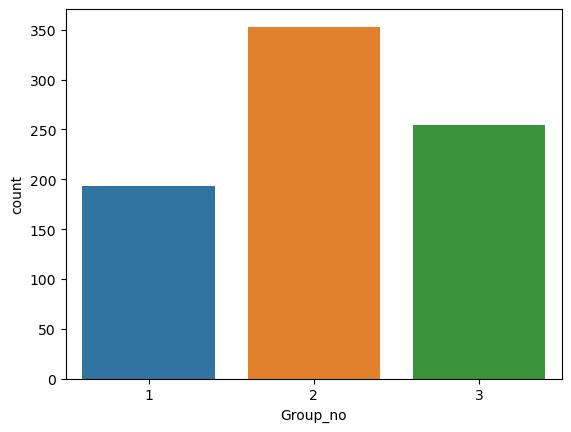

In [128]:
sns.countplot(train_df['Group_no'])


In [129]:
smote=SMOTE()
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)
xtest,ytest=smote.fit_resample(xtest,ytest)

In [131]:
mms=MinMaxScaler()
xtrain=mms.fit_transform(xtrain)
xtest=mms.transform(xtest)
test_df1=mms.fit_transform(test_df1)

In [132]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

Logistic Reg

In [133]:
log=LogisticRegression(penalty='l2')
log.fit(xtrain,ytrain)
pred_train_log=log.predict(xtrain)
report(ytrain,pred_train_log)
pred_test_log=log.predict(xtest)
report(ytest,pred_test_log)

Accuracy of model is 82.56 %

  [[251  28   2]
 [ 35 202  44]
 [  1  37 243]]

               precision    recall  f1-score   support

           1       0.87      0.89      0.88       281
           2       0.76      0.72      0.74       281
           3       0.84      0.86      0.85       281

    accuracy                           0.83       843
   macro avg       0.82      0.83      0.82       843
weighted avg       0.82      0.83      0.82       843

Accuracy of model is 65.74 %

  [[53 16  3]
 [13 36 23]
 [ 0 19 53]]

               precision    recall  f1-score   support

           1       0.80      0.74      0.77        72
           2       0.51      0.50      0.50        72
           3       0.67      0.74      0.70        72

    accuracy                           0.66       216
   macro avg       0.66      0.66      0.66       216
weighted avg       0.66      0.66      0.66       216



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [159]:
dtree=DecisionTreeClassifier(max_depth=6,min_samples_split=4,min_samples_leaf=8)
dtree.fit(xtrain,ytrain)
pred_train_dtree=dtree.predict(xtrain)
report(ytrain,pred_train_dtree)
pred_test_dtree=dtree.predict(xtest)
report(ytest,pred_test_dtree)

Accuracy of model is 78.29 %

  [[239  38   4]
 [ 30 222  29]
 [  2  80 199]]

               precision    recall  f1-score   support

           1       0.88      0.85      0.87       281
           2       0.65      0.79      0.71       281
           3       0.86      0.71      0.78       281

    accuracy                           0.78       843
   macro avg       0.80      0.78      0.79       843
weighted avg       0.80      0.78      0.79       843

Accuracy of model is 69.44 %

  [[57 14  1]
 [ 7 45 20]
 [ 1 23 48]]

               precision    recall  f1-score   support

           1       0.88      0.79      0.83        72
           2       0.55      0.62      0.58        72
           3       0.70      0.67      0.68        72

    accuracy                           0.69       216
   macro avg       0.71      0.69      0.70       216
weighted avg       0.71      0.69      0.70       216



Random Forest

In [201]:
rf=RandomForestClassifier(n_estimators=250,max_depth=8,min_samples_split=4,min_samples_leaf=6)
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
report(ytrain,pred_train_rf)
pred_test_rf=rf.predict(xtest)
report(ytest,pred_test_rf)

Accuracy of model is 89.92 %

  [[263  15   3]
 [ 18 236  27]
 [  0  22 259]]

               precision    recall  f1-score   support

           1       0.94      0.94      0.94       281
           2       0.86      0.84      0.85       281
           3       0.90      0.92      0.91       281

    accuracy                           0.90       843
   macro avg       0.90      0.90      0.90       843
weighted avg       0.90      0.90      0.90       843

Accuracy of model is 68.98 %

  [[52 16  4]
 [ 9 41 22]
 [ 1 15 56]]

               precision    recall  f1-score   support

           1       0.84      0.72      0.78        72
           2       0.57      0.57      0.57        72
           3       0.68      0.78      0.73        72

    accuracy                           0.69       216
   macro avg       0.70      0.69      0.69       216
weighted avg       0.70      0.69      0.69       216



ADA Boost

In [218]:
ada=AdaBoostClassifier(n_estimators=150,learning_rate=0.1)
ada.fit(xtrain,ytrain)
pred_train_ada=ada.predict(xtrain)
report(ytrain,pred_train_ada)
pred_test_ada=ada.predict(xtest)
report(ytest,pred_test_ada)

Accuracy of model is 70.94 %

  [[205  75   1]
 [ 23 190  68]
 [  1  77 203]]

               precision    recall  f1-score   support

           1       0.90      0.73      0.80       281
           2       0.56      0.68      0.61       281
           3       0.75      0.72      0.73       281

    accuracy                           0.71       843
   macro avg       0.73      0.71      0.72       843
weighted avg       0.73      0.71      0.72       843

Accuracy of model is 65.28 %

  [[47 24  1]
 [ 4 45 23]
 [ 0 23 49]]

               precision    recall  f1-score   support

           1       0.92      0.65      0.76        72
           2       0.49      0.62      0.55        72
           3       0.67      0.68      0.68        72

    accuracy                           0.65       216
   macro avg       0.69      0.65      0.66       216
weighted avg       0.69      0.65      0.66       216



In [257]:
gb=GradientBoostingClassifier(n_estimators=150,max_depth=13)
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
report(ytrain,pred_train_gb)
pred_test_gb=gb.predict(xtest)
report(ytest,pred_test_gb)

Accuracy of model is 100.0 %

  [[281   0   0]
 [  0 281   0]
 [  0   0 281]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       281
           2       1.00      1.00      1.00       281
           3       1.00      1.00      1.00       281

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843

Accuracy of model is 62.5 %

  [[44 22  6]
 [10 39 23]
 [ 4 16 52]]

               precision    recall  f1-score   support

           1       0.76      0.61      0.68        72
           2       0.51      0.54      0.52        72
           3       0.64      0.72      0.68        72

    accuracy                           0.62       216
   macro avg       0.64      0.62      0.63       216
weighted avg       0.64      0.62      0.63       216



In [235]:
ytrain_xgb=ytrain.map({1:0,2:1,3:2})
ytest_xgb=ytest.map({1:0,2:1,3:2})

In [237]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain_xgb)
pred_train_xgb=xgb.predict(xtrain)
report(ytrain_xgb,pred_train_xgb)
pred_test_xgb=xgb.predict(xtest)
report(ytest_xgb,pred_test_xgb)

Accuracy of model is 100.0 %

  [[281   0   0]
 [  0 281   0]
 [  0   0 281]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00       281
           2       1.00      1.00      1.00       281

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843

Accuracy of model is 66.67 %

  [[48 20  4]
 [11 38 23]
 [ 0 14 58]]

               precision    recall  f1-score   support

           0       0.81      0.67      0.73        72
           1       0.53      0.53      0.53        72
           2       0.68      0.81      0.74        72

    accuracy                           0.67       216
   macro avg       0.67      0.67      0.67       216
weighted avg       0.67      0.67      0.67       216



In [242]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
pred_train_gnb=gnb.predict(xtrain)
report(ytrain,pred_train_gnb)
pred_test_gnb=gnb.predict(xtest)
report(ytest,pred_test_gnb)

Accuracy of model is 55.28 %

  [[247  29   5]
 [122 136  23]
 [ 64 134  83]]

               precision    recall  f1-score   support

           1       0.57      0.88      0.69       281
           2       0.45      0.48      0.47       281
           3       0.75      0.30      0.42       281

    accuracy                           0.55       843
   macro avg       0.59      0.55      0.53       843
weighted avg       0.59      0.55      0.53       843

Accuracy of model is 44.44 %

  [[55 17  0]
 [32 33  7]
 [12 52  8]]

               precision    recall  f1-score   support

           1       0.56      0.76      0.64        72
           2       0.32      0.46      0.38        72
           3       0.53      0.11      0.18        72

    accuracy                           0.44       216
   macro avg       0.47      0.44      0.40       216
weighted avg       0.47      0.44      0.40       216



In [250]:
svc=SVC(C=0.8)
svc.fit(xtrain,ytrain)
pred_train_svc=svc.predict(xtrain)
pred_test_svc=svc.predict(xtest)
report(ytrain,pred_train_svc)
report(ytest,pred_test_svc)

Accuracy of model is 82.33 %

  [[249  28   4]
 [ 36 201  44]
 [  5  32 244]]

               precision    recall  f1-score   support

           1       0.86      0.89      0.87       281
           2       0.77      0.72      0.74       281
           3       0.84      0.87      0.85       281

    accuracy                           0.82       843
   macro avg       0.82      0.82      0.82       843
weighted avg       0.82      0.82      0.82       843

Accuracy of model is 61.11 %

  [[49 21  2]
 [17 36 19]
 [ 1 24 47]]

               precision    recall  f1-score   support

           1       0.73      0.68      0.71        72
           2       0.44      0.50      0.47        72
           3       0.69      0.65      0.67        72

    accuracy                           0.61       216
   macro avg       0.62      0.61      0.62       216
weighted avg       0.62      0.61      0.62       216



In [254]:
knn=KNeighborsClassifier(n_neighbors=37)
knn.fit(xtrain,ytrain)
pred_train_knn=knn.predict(xtrain)
pred_test_knn=knn.predict(xtest)
report(ytrain,pred_train_knn)
report(ytest,pred_test_knn)

Accuracy of model is 60.02 %

  [[220  38  23]
 [ 95  87  99]
 [ 38  44 199]]

               precision    recall  f1-score   support

           1       0.62      0.78      0.69       281
           2       0.51      0.31      0.39       281
           3       0.62      0.71      0.66       281

    accuracy                           0.60       843
   macro avg       0.59      0.60      0.58       843
weighted avg       0.59      0.60      0.58       843

Accuracy of model is 54.17 %

  [[49 14  9]
 [27 23 22]
 [11 16 45]]

               precision    recall  f1-score   support

           1       0.56      0.68      0.62        72
           2       0.43      0.32      0.37        72
           3       0.59      0.62      0.61        72

    accuracy                           0.54       216
   macro avg       0.53      0.54      0.53       216
weighted avg       0.53      0.54      0.53       216



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [ ]:
test_df1.head()

,duration_month,poi,resident_since,age,credits_no,liables,account_info_A11,account_info_A12,account_info_A13,account_info_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_account_A61,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_st_A71,employment_st_A72,employment_st_A73,employment_st_A74,employment_st_A75,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,gurantors_A101,gurantors_A102,gurantors_A103,property_type_A121,property_type_A122,property_type_A123,property_type_A124,installment_type_A141,installment_type_A142,installment_type_A143,housing_type_A151,housing_type_A152,housing_type_A153,job_type_A171,job_type_A172,job_type_A173,job_type_A174,telephone_A191,telephone_A192,foreigner_A201,foreigner_A202
0,24,4.0,4,54.0,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
1,18,3.0,4,48.0,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
2,20,1.0,4,24.0,2,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
3,12,4.0,4,35.0,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,12,1.0,2,24.0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0


In [260]:
pred=dtree.predict(test_df1)

In [261]:
predicted=pd.DataFrame()
predicted['serial number']=test_df['serial number']
predicted['Group_no']=pred

In [ ]:
predicted.to_csv('submissiondtree.csv')